In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
import re
%matplotlib inline

In [2]:
df=pd.read_csv("covid_19.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
6721,6722,03/18/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


In [5]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2766
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,6722.000000,6722.000000,6722.000000,6722.000000
mean,3361.500000,601.195924,19.855846,226.341267
std,1940.618587,4896.332140,204.486922,2556.035202
min,1.000000,0.000000,0.000000,0.000000
25%,1681.250000,2.000000,0.000000,0.000000
50%,3361.500000,13.000000,0.000000,0.000000
75%,5041.750000,108.000000,1.000000,11.000000
max,6722.000000,67800.000000,3122.000000,56927.000000


In [7]:
df=df.rename(columns={"Province/State":"state",
               "Country/Region":"country",
               "Last Update":"last_date",
                "Confirmed":"confirmed",
                "Deaths":"deaths",
                "Recovered":"recovered",
                "SNo":"number",
                "ObservationDate":"observation_date"
                
                      
               
              })

In [8]:
df

,number,observation_date,state,country,last_date,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [9]:
df["country"]=df["country"].str.lower().str.strip()
df["country"]


0              mainland china
1              mainland china
2              mainland china
3              mainland china
4              mainland china
                ...          
6717                 guernsey
6718                   jersey
6719              puerto rico
6720    republic of the congo
6721               the gambia
Name: country, Length: 6722, dtype: object

In [10]:
country=df["country"].unique()
country

array(['mainland china', 'hong kong', 'macau', 'taiwan', 'us', 'japan',
       'thailand', 'south korea', 'singapore', 'philippines', 'malaysia',
       'vietnam', 'australia', 'mexico', 'brazil', 'colombia', 'france',
       'nepal', 'canada', 'cambodia', 'sri lanka', 'ivory coast',
       'germany', 'finland', 'united arab emirates', 'india', 'italy',
       'uk', 'russia', 'sweden', 'spain', 'belgium', 'others', 'egypt',
       'iran', 'israel', 'lebanon', 'iraq', 'oman', 'afghanistan',
       'bahrain', 'kuwait', 'austria', 'algeria', 'croatia',
       'switzerland', 'pakistan', 'georgia', 'greece', 'north macedonia',
       'norway', 'romania', 'denmark', 'estonia', 'netherlands',
       'san marino', 'azerbaijan', 'belarus', 'iceland', 'lithuania',
       'new zealand', 'nigeria', 'north ireland', 'ireland', 'luxembourg',
       'monaco', 'qatar', 'ecuador', 'czech republic', 'armenia',
       'dominican republic', 'indonesia', 'portugal', 'andorra', 'latvia',
       'morocco', '

In [11]:
a=0
for i in df["country"]:
    if (i=="mainland china"):
        df.country[a]="china"
    a+=1
df.country

<ipython-input-11-6dd7219949d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country[a]="china"


0                       china
1                       china
2                       china
3                       china
4                       china
                ...          
6717                 guernsey
6718                   jersey
6719              puerto rico
6720    republic of the congo
6721               the gambia
Name: country, Length: 6722, dtype: object

In [12]:
df

,number,observation_date,state,country,last_date,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,china,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,china,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,china,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,china,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,china,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,puerto rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,republic of the congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [13]:
x=0
for i in df.country:
    i=re.sub(r"[^a-z\s]","",i)
    df.country[x]=i
    x+=1
df.country.unique()


<ipython-input-13-d5ec5f8136af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country[x]=i


array(['china', 'hong kong', 'macau', 'taiwan', 'us', 'japan', 'thailand',
       'south korea', 'singapore', 'philippines', 'malaysia', 'vietnam',
       'australia', 'mexico', 'brazil', 'colombia', 'france', 'nepal',
       'canada', 'cambodia', 'sri lanka', 'ivory coast', 'germany',
       'finland', 'united arab emirates', 'india', 'italy', 'uk',
       'russia', 'sweden', 'spain', 'belgium', 'others', 'egypt', 'iran',
       'israel', 'lebanon', 'iraq', 'oman', 'afghanistan', 'bahrain',
       'kuwait', 'austria', 'algeria', 'croatia', 'switzerland',
       'pakistan', 'georgia', 'greece', 'north macedonia', 'norway',
       'romania', 'denmark', 'estonia', 'netherlands', 'san marino',
       'azerbaijan', 'belarus', 'iceland', 'lithuania', 'new zealand',
       'nigeria', 'north ireland', 'ireland', 'luxembourg', 'monaco',
       'qatar', 'ecuador', 'czech republic', 'armenia',
       'dominican republic', 'indonesia', 'portugal', 'andorra', 'latvia',
       'morocco', 'saudi ara

In [14]:
df1=df.drop(["number","state","last_date"],axis=1)
df1.sort_values(by="country")

,observation_date,country,confirmed,deaths,recovered
3189,03/03/2020,afghanistan,1.0,0.0,0.0
2782,02/29/2020,afghanistan,1.0,0.0,0.0
5077,03/12/2020,afghanistan,7.0,0.0,0.0
2556,02/27/2020,afghanistan,1.0,0.0,0.0
4115,03/08/2020,afghanistan,4.0,0.0,0.0
...,...,...,...,...,...
3841,03/07/2020,vietnam,18.0,0.0,16.0
1018,02/08/2020,vietnam,13.0,0.0,1.0
600,02/02/2020,vietnam,6.0,0.0,1.0
308,01/28/2020,vietnam,2.0,0.0,0.0


In [15]:
df1[df1.country=="azerbaijan"]

,observation_date,country,confirmed,deaths,recovered
2663,02/28/2020,azerbaijan,1.0,0.0,0.0
2891,03/01/2020,azerbaijan,3.0,0.0,0.0
3024,03/02/2020,azerbaijan,3.0,0.0,0.0
3167,03/03/2020,azerbaijan,3.0,0.0,0.0
3326,03/04/2020,azerbaijan,3.0,0.0,0.0
3477,03/05/2020,azerbaijan,6.0,0.0,0.0
3660,03/06/2020,azerbaijan,6.0,0.0,0.0
3856,03/07/2020,azerbaijan,9.0,0.0,0.0
4091,03/08/2020,azerbaijan,9.0,0.0,0.0
4347,03/09/2020,azerbaijan,9.0,0.0,0.0


In [16]:
df1.groupby(["observation_date","country"])

In [17]:
a=df1.groupby(by = ["country","observation_date"]).sum()
a

confirmed  deaths  recovered
country     observation_date                              
afghanistan 02/24/2020              1.0     0.0        0.0
            02/25/2020              1.0     0.0        0.0
            02/26/2020              1.0     0.0        0.0
            02/27/2020              1.0     0.0        0.0
            02/28/2020              1.0     0.0        0.0
...                                 ...     ...        ...
vietnam     03/15/2020             56.0     0.0       16.0
            03/16/2020             61.0     0.0       16.0
            03/17/2020             66.0     0.0       16.0
            03/18/2020             75.0     0.0       16.0
zambia      03/18/2020              2.0     0.0        0.0

[3228 rows x 3 columns]

In [18]:
#a.loc["azerbaijan"]

In [22]:
group_country = df1.groupby(by = ["country"]).sum()
group_country

,confirmed,deaths,recovered
country,,,
afghanistan,139.0,0.0,3.0
albania,325.0,9.0,0.0
algeria,474.0,25.0,76.0
andorra,94.0,0.0,6.0
antigua and barbuda,6.0,0.0,0.0
...,...,...,...
uzbekistan,32.0,0.0,0.0
vatican city,4.0,0.0,0.0
venezuela,98.0,0.0,0.0


In [23]:
group_country.reset_index()

,country,confirmed,deaths,recovered
0,afghanistan,139.0,0.0,3.0
1,albania,325.0,9.0,0.0
2,algeria,474.0,25.0,76.0
3,andorra,94.0,0.0,6.0
4,antigua and barbuda,6.0,0.0,0.0
...,...,...,...,...
172,uzbekistan,32.0,0.0,0.0
173,vatican city,4.0,0.0,0.0
174,venezuela,98.0,0.0,0.0
175,vietnam,1056.0,0.0,502.0


In [26]:
plt.figure(figsize=(18,9))
plt.plot(group_country["albania"])
plt.xticks(np.arange(0,60,step=5))
plt.xlabel("observation_date",size=16)
plt.ylabel("confirmed",rotation="vertical")
plt.grid(True)
plt.show()

KeyError: 'albania'

<Figure size 1296x648 with 0 Axes>

In [20]:
group_date = df1.groupby(by = ["observation_date"]).sum()
group_date.reset_index()

,observation_date,confirmed,deaths,recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
5,01/27/2020,2927.0,82.0,61.0
6,01/28/2020,5578.0,131.0,107.0
7,01/29/2020,6165.0,133.0,126.0
8,01/30/2020,8235.0,171.0,143.0
9,01/31/2020,9925.0,213.0,222.0


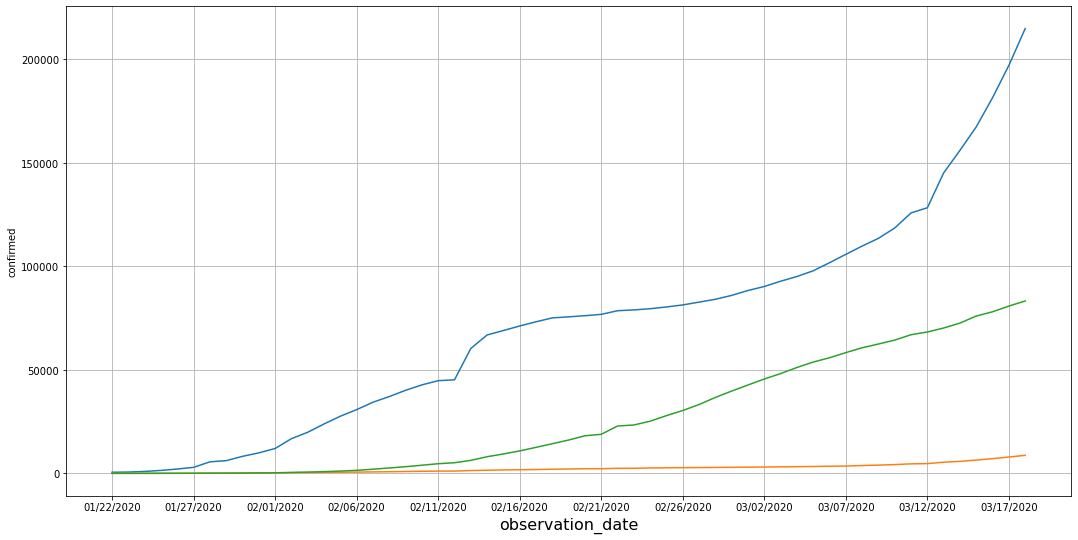

In [21]:
plt.figure(figsize=(18,9))
plt.plot(group_date)
plt.xticks(np.arange(0,60,step=5))
plt.xlabel("observation_date",size=16)
plt.ylabel("confirmed",rotation="vertical")
plt.grid(True)
plt.show()